In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.nn.functional import softmax
from torchvision import datasets, transforms

import os
import pandas as pd
from numpy import linalg as LA
from tqdm import tqdm
import time
from torch.utils import data
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
from scipy.linalg import eigh
from scipy.linalg import eig

from scipy.stats import multivariate_normal as normalpdf
from scipy.stats import multinomial as multinomial
from numpy.random import multivariate_normal as sample_normal
from numpy.random import binomial as binomial
import random

import collections

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
path = "../input/deeponet-homog/exact_u_test.npy"
exact_u = np.load(path)
np.shape(exact_u)

path = "../input/deeponet-homog/exact_u_test.npy"
exact_u_copy = np.load(path)
np.shape(exact_u_copy)

path = "../input/deeponet-homog/set_sol0.npy"
set_sol0 = np.load(path)
np.shape(set_sol0)

path = "../input/deeponet-homog/set_sol_test_version.npy"
set_sol2 = np.load(path)
np.shape(set_sol2)


aa = 101
bb = 101

homog_sol = np.reshape(set_sol0[-1], (aa, bb))
exact_sol = np.reshape(exact_u_copy, (aa, bb))
exact_test_u = np.reshape(exact_u, (aa, bb))

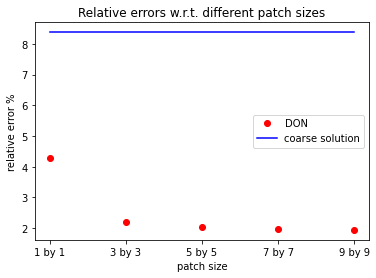

In [7]:
# raw input data: operator_hmgn_2d_data (v3)
# results from  v63(5.39), v60(6.68), v58(8.6), v64(10.441432), v59 (12.46) of kernel : operator_homog_deeponet
# keyword: 2d_don_results
relative_errs_don = np.flip([5.393069, 6.680661, 8.615893, 10.441432, 12.467102] )
relative_errs_bel = [5.393069, 6.680661, 8.615893, 10.441432, 12.467102] 

# new results 4.282954 (v 67), 2.197676 (v 72), 2.048324 (v 71), 1.974543 (v 68), 1.939539 (v 70)
relative_errs_don = [4.282954, 2.197676, 2.048324, 1.974543 ,1.939539]
patch_size = np.flip(["9 by 9", "7 by 7", "5 by 5", "3 by 3","1 by 1"])

low_accuracy_model = [LA.norm(exact_sol-homog_sol)/LA.norm(exact_sol)*100 for ii in range(len(patch_size))]

plt.plot(patch_size, relative_errs_don, "ro", label = "DON")
# plt.plot(patch_size, relative_errs_bel, "ko", label = "Bel solution")
plt.plot(patch_size, low_accuracy_model, "b-", label = "coarse solution")
plt.xlabel("patch size")
plt.ylabel("relative error %")
plt.title("Relative errors w.r.t. different patch sizes")
plt.legend()
plt.show()

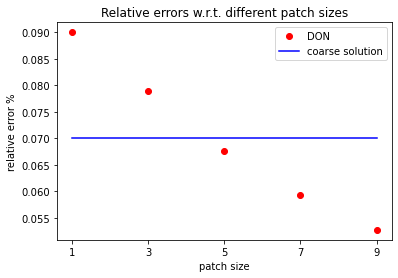

In [8]:
# 0.059371 over sampling 7 v97 operator_homog_1d
# 0.067654 over 5 v94 operator_homog_1d
# 0.052734 over 9 v100 operator_homog_1d
# 0.090022 over 1 v99 operator_homog_1d
# 0.078855 over 3 v98 operator_homog_1d
# keyword: 1d_don_results

elliptic_1d_exact_homog_don =  ([0.090022, 0.078855 , 0.067654, 0.059371, 0.052734])

patch_size = np.flip(["9", "7", "5", "3","1"])

low_accuracy_model = ( [0.07007708956516576 for ii in range(len(patch_size))])

plt.plot(patch_size, elliptic_1d_exact_homog_don, "ro", label = "DON ")
plt.plot(patch_size, low_accuracy_model, "b-", label = "coarse solution")
plt.xlabel("patch size")
plt.ylabel("relative error %")
plt.title("Relative errors w.r.t. different patch sizes")
plt.legend()
plt.show()

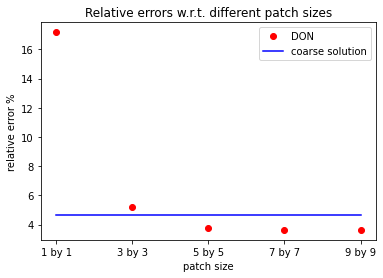

In [5]:
# % data from operator_hmgz_nonsprb_data v4
# operator_nspb_donn v12  17.1821
# operator_nspb_donn v18 5.188245
# operator_nspb_donn v20 3.788024
# operator_nspb_donn v19 3.657967
# operator_nspb_donn v24 3.629643
# keyword: 2d_multi

elliptic_1d_exact_homog_don =  ([17.18213, 5.188245 , 3.788024, 3.657967, 3.629643])

patch_size = np.flip(["9 by 9", "7 by 7", "5 by 5", "3 by 3","1 by 1"])

low_accuracy_model = [4.640113167772876 for ii in range(len(patch_size))]

plt.plot(patch_size, elliptic_1d_exact_homog_don, "ro", label = "DON ")
plt.plot(patch_size, low_accuracy_model, "b-", label = "coarse solution")
plt.xlabel("patch size")
plt.ylabel("relative error %")
plt.title("Relative errors w.r.t. different patch sizes")
plt.legend()
plt.show()

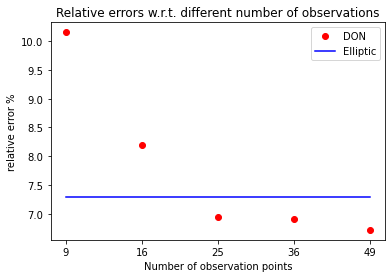

In [3]:
# % data from simon_rte v33
# 10.157501: v19 operator_homg_rte, 9 obs points
# 8.197279: v23 operator_homg_rte: 16 obs
# 6.939778: v22 operator_homg_rte, 25 obs
# 6.908147: v17 operator_homg_rte, 36 obs
# 6.717302: v20 operator_homg_rte, 49 obs

# keyword: 2d_rt

elliptic_1d_exact_homog_don =  ([10.157501, 8.197279, 6.939778, 6.908147, 6.717302])

patch_size = np.flip(["49", "36", "25", "16", "9"])

low_accuracy_model = [7.294998856491188 for ii in range(len(patch_size))]

plt.plot(patch_size, elliptic_1d_exact_homog_don, "ro", label = "DON ")
plt.plot(patch_size, low_accuracy_model, "b-", label = "Elliptic")
plt.xlabel("Number of observation points")
plt.ylabel("relative error %")
plt.title("Relative errors w.r.t. different number of observations")
plt.legend()
plt.show()